# ML in Cybersecurity: Task I

## Team
  * **Team name**:  *ChickenEgg*
  * **Members**:  *Sangeet Sagar (sasa00001@stud.uni-saarland.de), Abhijith Srinivas Bidaralli (abbi00001@stud.uni-saarland.de), Abhinav Bhatt (abbh00001@stud.uni-saarland.de)*


## Logistics
  * **Due date**: 11th November 2021, 23:59:59 (email the completed notebook including outputs to mlcysec_ws2022_staff@lists.cispa.saarland)
  * Please include your team name and the task number in the file name and the email subject
  * Complete this in **teams of 3**
  * Feel free to use the forum or the mailing list to find group members.
  
## Timeline
  * 29-Oct-2021: Task 1 hand-out
  * **11-Nov-2021** (23:59:59): Email the completed notebook including outputs to mlcysec_ws2022_staff@lists.cispa.saarland
  * 12-Nov-2021: Task 1 discussion and summary
  
  
## About this task
In this task, you'll implement a digit classifier, based on the popular [MNIST](http://yann.lecun.com/exdb/mnist/) dataset. The dataset is based on a seminal [paper](http://yann.lecun.com/exdb/publis/pdf/lecun-01a.pdf), which immensely popularized (convolutional) neural networks. This is a great starting point for ML research and this dataset/model has been a stepping stone numerous other tasks such as [GANs](https://papers.nips.cc/paper/5423-generative-adversarial-nets.pdf), [Adversarial Perturbations](https://arxiv.org/abs/1412.6572) and so many more!

This dataset consists of data $\mathcal{D} = \{x_i, y_i\}_{i=1}^N$, where $x_i$ is a 28x28 pixel grayscale image and $y_i$ is a scalar represeting digits between 0-9. The notebook will guide you to load this data, implement classifiers $\hat{y_i} = f_w(x_i)$  and analyze results. By doing so, you'll have a ML model that works on real data!

To put things into context, have a look at Slide 21 in the [second](https://cms.cispa.saarland/mlcysec19/dl/4/2019-10-24-ml.pdf) lecture. Within this framework, the following blocks of this task are fixed:
  * *Real-world problem*: Digit classification
  * *Performance metric*: Mean accuracy i.e., $ \frac{1}{N} \sum_{i=1}^N \mathbb{1}[\hat{y_i} = y_i]$, where $\mathbb{1}[\hat{y_i} = y_i]$ is 1 if your model predicted the right digit for the $i$-th digit and 0 otherwise.
  * *Data*: The MNIST dataset

You'll make the the following design-choices:
 * *Choice of Model*: A model family (Non-parametric methods, Linear classifiers, Neural Networks, etc.)
 * *ML Model*: Specific model (e.g., SVM with a polynomial kernel)
 * *Loss/Risk*
 * *Optimization*


## A Note on Grading
The grading for this task will depend on:
 1. Functional digit classifier
   * Following a well-defined ML pipeline
   * Developing 3 classification models (keep them diverse and ideally of increasing complexity)
   * Obtaining reasonable accuracies (>80%) on a held-out test set
 1. Analysis
   * Which methods work better than the rest and why?
   * Which hyper-parameters and design-choices were important in each of your methods?
   * Quantifying influence of these hyper-parameters on loss and/or validation accuracies
   * Trade-offs between methods, hyper-parameters, design-choices
    * Anything else you find interesting (this part is open-ended)
  
 A note on (1.): 
  * Choose your models that aids good insights. We require at least one non-Neural Network (e.g., SVM, KNN) and one Neural Network model (e.g., MLP, CNN).
  * We definitely don't expect all three models to achieve >99% test accuracies!

## Grading Details
 * 5 points for loading and visualization 
 * 25x3 points for models. Per model:
   * 4 points for written description 
   * 7 points for implementation
   * 7 points for evaluation
   * 7 points for summary
 * 15 points for final summary (Section 3)
 * 5 points for clean code
 
## Filling-in the Notebook
You'll be submitting this very notebook that is filled-in with your code and analysis. Make sure you submit one that has been previously executed in-order. (So that results/graphs are already visible upon opening it). 

The notebook you submit **should compile** (or should be self-contained and sufficiently commented). Check tutorial 1 on how to set up the Python3 environment.


**The notebook is your task report. So, to make the report readable, omit code for techniques/models/things that did not work. You can use final summary to provide report about these codes.**

It is extremely important that you **do not** re-order the existing sections. Apart from that, the code blocks that you need to fill-in are given by:
```
#
#
# ------- Your Code -------
#
#
```
Feel free to break this into multiple-cells. It's even better if you interleave explanations and code-blocks so that the entire notebook forms a readable "story".


## Code of Honor
We encourage discussing ideas and concepts with other students to help you learn and better understand the course content. However, the work you submit and present **must be original** and demonstrate your effort in solving the presented problems. **We will not tolerate** blatantly using existing solutions (such as from the internet), improper collaboration (e.g., sharing code or experimental data between groups) and plagiarism. If the honor code is not met, no points will be awarded.

 
 ## Versions
  * v2.0: Added pytorch
  * v1.1: Added Code of Honor
  * v1.0: Initial notebook
  
  ---

In [1]:
import time 
 
import numpy as np 
import matplotlib.pyplot as plt 

import json 
import time 
import pickle 
import sys 
import csv 
import os 
import os.path as osp 
import shutil 

import pandas as pd

from IPython.display import display, HTML
 
%matplotlib inline 
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots 
plt.rcParams['image.interpolation'] = 'nearest' 
plt.rcParams['image.cmap'] = 'gray' 
 
# for auto-reloading external modules 
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython 
%load_ext autoreload
%autoreload 2

In [2]:
# Load other libraries here.
# Keep it minimal! We should be easily able to reproduce your code.

# We only support sklearn and pytorch.

# Please set random seed to have reproduceable results, e.g. torch.manual_seed(123)
import os
import math

import torch
import torchvision
import torchvision.transforms as transforms
import torch.optim as optim
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader
import torch.nn as nn

from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, PredefinedSplit
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score
from sklearn.svm import SVC
from joblib import dump, load

torch.manual_seed(123)

Helpers

In case you choose to have some methods you plan to reuse during the notebook, define them here. This will avoid clutter and keep rest of the notebook succinct.

In [3]:
def identity_func(foo):
    return foo


#
#
# ------- Your Code -------
#
#

def sort_list(a, b, c):
    """
    Sort two list and use the same order to sort third list.
    """
    dic_train = {k: v for k, v in zip(a, b)}
    dic_train = {k: v for k, v in sorted(dic_train.items(), key=lambda item: item[1])}
    dic_test = {k: v for k, v in zip(a, c)}
    for k,v in dic_train.items():
        dic_train[k] = [v, dic_test[k]]
    a = list(dic_train.keys())
    train_val = list(dic_train.values())
    train = [item[0] for item in train_val]
    val = [item[1] for item in train_val]
    return a, train, val


def create_predefined_splits(len_train, len_test):
    """ Predefined split
    """
    # The indices which have the value -1 will be kept in train.
    train_indices = np.full((len_train,), -1)

    # The indices which have zero or positive values, will be kept in test
    test_indices = np.full((len_test,), 0)
    test_fold = np.append(train_indices, test_indices)

    return PredefinedSplit(test_fold)


# You can use this function to flatten 2D inputs
def flatten_input_pixels(x_input):
    result = []
    for i in range(len(x_input)):
        result.append(x_input[i].flatten())
    return np.array(result, np.uint8)  # [n_samples, n_features]


# You can use this function to plot the accuracy of the models with different parametes
def plot_scores(x, y, title = "Title", x_label = "X", y_label = "Y"):
    fig, ax = plt.subplots(nrows=1,ncols=1)
    
    ax.plot(x, y)
    ax.set_xticks(x)
    ax.set_title(title)
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)
    ax.set_ylim(0.6, 1.0)

# You can use this function to visualize input images and the predictions of your models
# "y_pred" is output of your model 
# "n_val" is number of instances in test or validation sets
def vis_predictions(x_eval, y_eval, y_pred, n_val):
    rows, cols = 4, 3

    fig,ax = plt.subplots(nrows = rows, ncols = cols)

    ids = np.random.randint(0,n_val,rows*cols)
    for i in range(cols):   
        for j in range(rows):
            ax[j][i].set_title('True label: {0}, Predicted label: {1}'.format(y_eval[ids[(i*rows)+j]], 
                                                                              y_pred[ids[(i*rows)+j]]))
            two_d = (np.reshape(x_eval[ids[(i*rows)+j]], (28, 28))).astype(np.uint8)
            ax[j][i].imshow(two_d)
            ax[j][i].axes.get_xaxis().set_visible(False)
            ax[j][i].axes.get_yaxis().set_visible(False)


    plt.tight_layout()  

# 1. Loading and Visualizing data (5 points)

In this section, you'll need to prepare the MNIST data for the experiments you'll be conducting for the remainder of the notebook.

## 1.1. Load Data

Here you'll load the MNIST data into memory. The end-goal is to two have the following variables:
  * `x_trainval`, `x_test`: of shape $N \times d_1 \times d_2 \dots$ (e.g., $N \times 784$. 784 since you could flatten each 28x28 pixel image into a single vector)
  * `y_trainval`, `y_test`: of shape $N \times K$ (K = 1 or 10 depending on how you plan to represent the ground-truth digit annotation)

You can either do this by:
  1. Downloading the MNIST dataset, unpacking and preparing it yourself to have fine-grained control
  1. Using high-level existing functions, such as the one provided by  [`torchvision.datasets`](https://pytorch.org/docs/stable/torchvision/datasets.html#mnist).
  
  
  In either case, it is important that you have disjoint train, val, and test splits!

In [4]:
# Loading MNIST dataset using torchvision.datasets
train_set = torchvision.datasets.MNIST(root='.', train=True, transform=None, download=True)
test_set = torchvision.datasets.MNIST(root='.', train=False, transform=None, download=True)

# Separate out valiation data from train set to be used in later parts
val_frac = 0.1
k = int(len(train_set.targets) * (1 - val_frac))
x_trainval_3d = train_set.data
y_trainval = train_set.targets

# Train
x_train_3d = torch.tensor(x_trainval_3d.tolist()[:k])
y_train = torch.tensor(y_trainval.tolist()[:k])

# Validation
x_val_3d = torch.tensor(x_trainval_3d.tolist()[k:])
y_val = torch.tensor(y_trainval.tolist()[k:])

# Test
x_test_3d = test_set.data
y_test = test_set.targets

print('x_train.shape = {},  y_train.shape = {}'.format(x_train_3d.shape, y_train.shape))
print('x_val.shape = {},  y_val.shape = {}'.format(x_val_3d.shape, y_val.shape))
print('x_test.shape = {},  y_test.shape = {}'.format(x_test_3d.shape, y_test.shape))


# Feel free to have multiple variables in case your models are designed for different formats
# For instance, in case your model requires Nx28x28 inputs, declare x_trainval_3d, etc.

# Tip: Set this to a tiny number (such 0.05) to aid debugging
# After all, you do not want to train/evaluate on the entire dataset to find bugs
DEBUG_FRAC = 1.0
x_trainval_3d = x_trainval_3d[:int(len(x_trainval_3d)*DEBUG_FRAC)]
y_trainval = y_trainval[:int(len(y_trainval)*DEBUG_FRAC)]


x_train.shape = torch.Size([54000, 28, 28]),  y_train.shape = torch.Size([54000])
x_val.shape = torch.Size([6000, 28, 28]),  y_val.shape = torch.Size([6000])
x_test.shape = torch.Size([10000, 28, 28]),  y_test.shape = torch.Size([10000])


#### 1.2. Visualize Data

To get the hang of your data you'll be training a digit classifier on, visualize it.

Examples of ways to visualize it:
  * Given a digit, display few randomly sampled images for this digit (the bare minimum)
  * Visualize as a grid (e.g., Slide 4, [Lecture 2](https://cms.cispa.saarland/mlcysec19/dl/4/2019-10-24-ml.pdf)) using a combination of `plt.imshow` and `plt.subplots`
  
It's up to you to decide how you want to do this. The end-goal is for you to potentially give a trailer of the dataset to someone who hasn't seen it before.

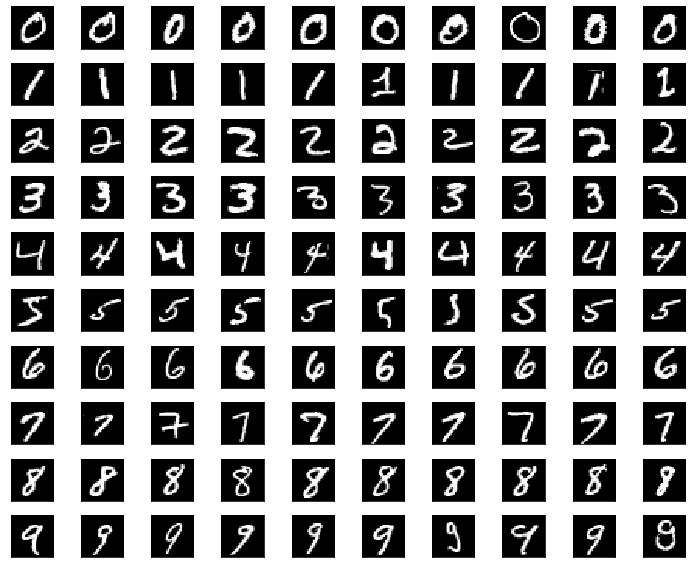

In [5]:
# Visualize 10 examples of 10 classes. You can extend the following code:
rows, cols = 10, 10
fig,ax = plt.subplots(nrows = rows, ncols = cols)

for row in range(rows):
    idx = y_trainval==row
    y_sample = y_trainval[idx]
    x_sample = x_trainval_3d[idx]
    for col in range(cols):
        ax[row, col].imshow(x_sample[col], cmap='gray')
        ax[row, col].set_xticks([]), ax[row, col].set_yticks([])
#         ax[row, col].set_title("lab: {}".format(y_sample[col]))
        

fig.tight_layout()
plt.savefig('fig1.pdf')   # Save the figures
plt.show()   # These should be some visualization of data at the end of this section

# You can see an output example in the follow:

# 2. Digit classifiers

In this section, you'll begin developing models to perform digit classification.

Each model needs to be structured like so:
  1. Give a brief reason which model you are going to train and why you choose it
  1. Define hyper-parameters for model and optimization procedure
  1. Define your model
  1. Define optimization method and fit model to data
  1. Summarize your findings







## 2.1: Model [M1]: *fill-this-in* (25 points)

We use $k-NN as its one of the most basic non-linear classfier used for supervised learning. We chose it for the reason that it is faster to train and the test performance is not affected much when trained on a part of the data. It leverages the degree of similarity between a test sample and training sample. In simple, the label of a test sample is the one for which it shows closest similarity to the training sample.

$k$-NN (k-nearest neighbour) is an example of a non-parametric machine learning algorithm because its parameters are not fixed. That is to say; the parameters vary with the size of the data. In a sense, these models can increase in capacity if they have more training data. <br>

$k$ in $k$-NN stands for the $k$ nearest neighbours that should be considered for voting when determining the class of a test sample. Let us see the working of a k-NN algorithm for classification. <br>

1. The algorithm begins with storing each training sample and its corresponding label. 
2. Explicitly define the value of $k$, i.e. the total number of closest neighbours, to check for majority voting process. 
3. Compute the distance between each training and test sample using any distance metrics like `euclidean`, `manhattan` or `chebyshev`.
4. Sort the distance and pick the target labels of top $k$ training samples. These training samples are the ones with the closest distance (or perhaps least distance) to the test sample.
5. Perform voting for each target label, and the one with the highest frequency is assigned to the test sample.
6. Repeat this process for test samples in the data.

### 2.1.1: Hyper-parameters

Define hyper-parameters for your model here.

For the given dataset we have use multiple hyperparameters like number of neighbours, weights and distance metric. We will perform a grid search to determine the best hyperparameters for the dataset.

In [6]:
param_grid = {
    "knn__n_neighbors": [3, 5, 7, 9],
    "knn__weights": ['uniform', 'distance'],
    "knn__algorithm": ['auto'],
    "knn__metric": ['euclidean','manhattan','chebyshev']
}

### 2.1.2: Data Preprocessing


In [7]:
# Flatten: [54000, 28, 28] into [54000, 784], normalization to be done in the pipeline.
x_train_np = torch.flatten(x_train_3d, start_dim=1, end_dim=2).numpy()
x_val_np = torch.flatten(x_val_3d, start_dim=1, end_dim=2).numpy()
x_test_np = torch.flatten(x_test_3d, start_dim=1, end_dim=2).numpy()

y_train_np = y_train.numpy()
y_val_np = y_val.numpy()
y_test_np = y_test.numpy()

# Use only a part of trainset~ 20% for GridSearch parameter estimation.
k = int(len(y_train_np) * 0.2)
# Use pre-defined split to explicitly specity train and test in GridSearchCV
ps = create_predefined_splits(len(x_train_np[:k]), len(x_val_np))
x_train_val = np.append(x_train_np[:k], x_val_np, axis=0)
y_train_val = np.append(y_train_np[:k], y_val_np, axis=0)
print('x_train_val.shape = {},  y_train_val.shape = {}'.format(x_train_val.shape, y_train_val.shape))

x_train_val.shape = (16800, 784),  y_train_val.shape = (16800,)


### 2.1.3: Model

Define your model here

In [8]:
knn = KNeighborsClassifier()
pipe = Pipeline(steps=[('scale', StandardScaler()), ("knn", knn)])
search = GridSearchCV(pipe, param_grid, n_jobs=10, verbose=2, cv=ps, return_train_score=True)
print(search)

GridSearchCV(cv=PredefinedSplit(test_fold=array([-1, -1, ...,  0,  0])),
             estimator=Pipeline(steps=[('scale', StandardScaler()),
                                       ('knn', KNeighborsClassifier())]),
             n_jobs=10,
             param_grid={'knn__algorithm': ['auto'],
                         'knn__metric': ['euclidean', 'manhattan', 'chebyshev'],
                         'knn__n_neighbors': [3, 5, 7, 9],
                         'knn__weights': ['uniform', 'distance']},
             return_train_score=True, verbose=2)


### 2.1.4: Fit Model

Define optimization procedure and fit your model to the data

In [9]:
optim_time = time.time()
_ = search.fit(x_train_val, y_train_val)
optim_time_end = time.time()
print(f"Model opimization time: {optim_time_end-optim_time:.3f} s")

Fitting 1 folds for each of 24 candidates, totalling 24 fits
Model opimization time: 620.810 s


### 2.1.5: Evaluation

Evaluate your model.
  * Evaluate models with different parameters 
  * Plot the score (accuracy) for each model using "plot_scores" function
  * Report score for the best model
  * Use "vis_predictions" function to visualize few examples of test/validation set with the corresponding predictions


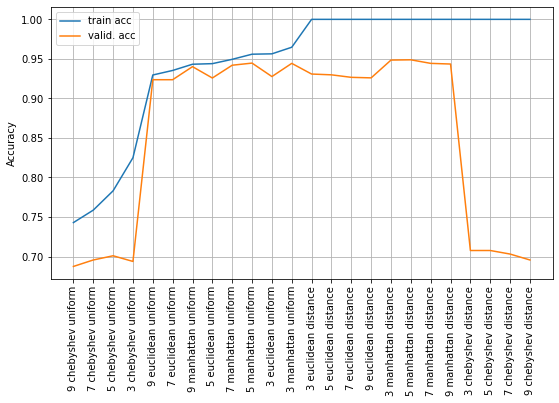

In [11]:
# Evaluate models with different parameters and
# plot score (accuracy) for each model (not using the pre-defined function).

params = []
for item in search.cv_results_['params']:
    params.append(str(item['knn__n_neighbors']) + " " + item['knn__metric'] + " " + item['knn__weights'])

mean_val_scores = [item for item in search.cv_results_['mean_test_score']]
mean_train_scores = [item for item in search.cv_results_['mean_train_score']]
params, mean_train_scores, mean_val_scores = sort_list(params, mean_train_scores, mean_val_scores)

fig = plt.figure(figsize=(9,5))
plt.plot(mean_train_scores, label="train acc")
plt.plot(mean_val_scores, label="valid. acc")
plt.legend()
plt.grid()
plt.ylabel('Accuracy')
_ = plt.xticks(range(len(params)), params, rotation ='90')

In [12]:
# Here report the score for the best model
print("Best parameter (CV score=%0.3f):" % search.best_score_)
print(search.best_params_)

Best parameter (CV score=0.949):
{'knn__algorithm': 'auto', 'knn__metric': 'manhattan', 'knn__n_neighbors': 5, 'knn__weights': 'distance'}


In [13]:
print(search.best_estimator_)

Pipeline(steps=[('scale', StandardScaler()),
                ('knn',
                 KNeighborsClassifier(metric='manhattan', weights='distance'))])


# ================== ALERT ======================
If you wish to observe training error (on the entire train set), uncomment line 7-11. This will take around 20 mins only to tell you that the trainin accuracy is 100%.

In [14]:
## Training on entire train set.

# best_estimator_ will by default use the same pipe as above with best parameters.
pipe = search.best_estimator_
new_knn = pipe.fit(x_train_np, y_train_np)

# start = time.time()
# train_score = new_knn.score(x_train_np, y_train_np)
# end = time.time()
# print(f"Train acc: {train_score*100:.3f}%")
# print(f"Fitting time on train data: {end-start:.3f} s")

val_time = time.time()
val_score = new_knn.score(x_val_np, y_val_np)
val_time_end = time.time()
print(f"Fitting time on validation data: {val_time_end-val_time:.3f} s")
print(f"Val acc: {val_score*100:.3f}%")

Fitting time on validation data: 129.893 s
Val acc: 97.000%


In [15]:
# Predict target labels for test set and generate scores, classification report.
print("Evaluating on test data")
start = time.time()
y_pred = new_knn.predict(x_test_np)
end = time.time()
print(f"Test acc: {accuracy_score(y_test_np, y_pred)*100:.3f}%")
print(classification_report(y_test_np, y_pred))
print(f"Fitting time on test data: {end-start:.3f} s")

Evaluating on test data
Test acc: 95.750%
              precision    recall  f1-score   support

           0       0.96      0.99      0.98       980
           1       0.93      1.00      0.96      1135
           2       0.98      0.94      0.96      1032
           3       0.95      0.96      0.95      1010
           4       0.97      0.95      0.96       982
           5       0.95      0.95      0.95       892
           6       0.98      0.98      0.98       958
           7       0.94      0.95      0.94      1028
           8       0.98      0.91      0.94       974
           9       0.95      0.94      0.94      1009

    accuracy                           0.96     10000
   macro avg       0.96      0.96      0.96     10000
weighted avg       0.96      0.96      0.96     10000

Fitting time on test data: 214.509 s


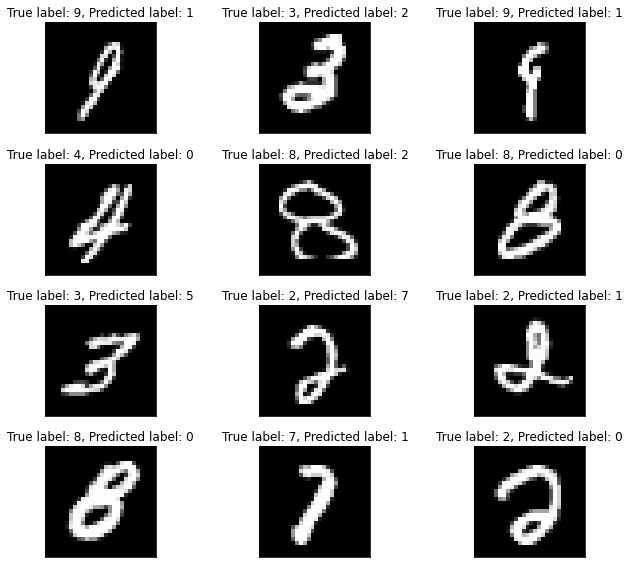

In [16]:
# Visualize the predictions
incorr_pred = [i for i in range(len(y_pred)) if y_pred[i] != y_test_np[i]]
x_test_incorr = [x_test_np[i] for i in incorr_pred]
y_test_incorr = [y_test_np[i] for i in incorr_pred]
y_pred_incorr = [y_pred[i] for i in incorr_pred]

vis_predictions(x_test_incorr, y_test_incorr, y_pred_incorr, len(y_pred_incorr))

### 2.1.6: Summary
   
For $k$-NN, we focused on a few parameters like number nearest neighbours $k$, weight function used in prediction, and distance metric as they are observed to have maximum impact on the performance. We decided to use only odd values of $k$ to avoid any tieing when doing the majority voting. These parameters were computed based on $20\%$ of the training data (to avoid excessing time just for model optimization) and validated on a predefined validation set.

Analyzing the plot of training and validation accuracy, we infer that `manhattan` is a better distance metric `euclidean` or `chebyshev`. Taking too many nearest neighbour $\geq 7$ also doesn't do any good on the validation data. Visually it can be observed that $k=3$ and $k=5$ seemed to perform equally good both on the training data (training mean score ~99%) and the validation data (validation mean score ~ 95%).
Furthermore, the best parameters (depending on the mean train score and test score) were found to be for $k=5$ and distance metric when set to `distance`.

Total run-time ~ 15 mins
- Model optimization: 10 mins
- Fit on validation data: 2 mins
- Test performance: 3.5 mins

We found the validation accuracy to be 97%, and the test accuracy was 95.5%. We observed that $k$-NN could recall true label of  digits 1 and 0 for almost ~100% of the time (checking the recall value). Digit 8 is observed to have the least recall value. <br>
That being said, $k$-NN algorithm is not really the best algorithm for classification task like MNIST. It doesn't really learn anything; instead, it computes target label based on a mere similarity measure. It also has no procedure to correct and learn from mistakes. Nevertheless, it is a very suitable algorithm to get quickly started and get accurate results.

# 2.2: Model [M2]: *fill-this-in* (25 points)

We use Support Vector Machines (SVMs) as the second classifier. SVMs are linear classifiers that can be used to separate both linear as well as non-linear data. SVMs come under the category of maximum margin classifiers as they aim to maximize the margin (distance) between the points belonging to different classes and the decision boundary. This margin also provides robustness to SVMs as small disturbances to a data point will not change the point's class due to margin. For non-linear data SVMs apply the kernel-trick, which means the hyperplane is constructed similar to one that would be constructed if the points were in a higher-dimensional space, and the kernel trick ensures that we do not have to actually transform the points to the higher dimensional space, but can obtain similar results to as if we the points were in higher dimensions. Although the computational complexity of SVMs is high, for cases where the data points are not too much, they work very well. We choose SVM in this case because they are powerful parametric classifiers and they were the most used classifiers in pre deep learning era. Different kernels would perform different transformations of the data, and it would be great to see how they and their associated hyperparameters affect our results. We also wanted to see how a linear classifier performs before trying deep learning-based approaches. The primal form for the optimization objective of SVM is given by-:

\begin{eqnarray*}
\min_{w,b,\xi} && \frac{1}{2} w^T w 
+ C \sum_{i=1}^n \xi_i  \\
&& \textrm{subject to} \\
&& y_i (w^T \phi(x_i) + b) \geq 1 - \xi_i, 
\nonumber \\
&& \xi_i \geq 0, i = 1, \ldots, n 
\nonumber 
\end{eqnarray*}

There are a number of hyperparameters to choose from in SVMs. The most important one is the kernel which specifies which transformation is applied to the data before the hyperplane is constructed. Then for each of the kernels, we have `C` parameter. This can be thought of as the inverse of the regularisation coefficient lambda in other ML models. So higher `C` implies less regularisation, and lower `C` implies more regularisation. Then for `rbf` (Gaussian) kernel, we have gamma, which specifies the inverse influence of a point on the other points. So higher gamma means low influence, and lower gamma means more influence. So, higher gamma will make the decision boundary more complex and vice versa.

### 2.2.1: Hyper-parameters

Define hyper-parameters for your method here

In [17]:
# Defining the parameter grid.
param_grid = [
               {"svc__kernel": ["linear"], "svc__C": [0.1, 1, 10]},
               {"svc__kernel": ["rbf"], "svc__gamma": [0.001, 0.01, 0.1, 1, 2], "svc__C": [0.1, 1, 10]},
               {"svc__kernel": ["poly"], "svc__degree": [3, 4, 5], "svc__C": [0.1, 1, 10]}
]

### 2.2.2: Data Preprocessing


In [18]:
# Flatten: [54000, 28, 28] into [54000, 784], normalization to be done in the pipeline.
x_train_np = torch.flatten(x_train_3d, start_dim=1, end_dim=2).numpy()
x_val_np = torch.flatten(x_val_3d, start_dim=1, end_dim=2).numpy()
x_test_np = torch.flatten(x_test_3d, start_dim=1, end_dim=2).numpy()

y_train_np = y_train.numpy()
y_val_np = y_val.numpy()
y_test_np = y_test.numpy()

# Use only a part of trainset~ 20% for GridSearch parameter estimation.
k = int(len(y_train_np) * 0.2)
# Use pre-defined split to explicitly specity train and test in GridSearchCV
ps = create_predefined_splits(len(x_train_np[:k]), len(x_val_np))
x_train_val = np.append(x_train_np[:k], x_val_np, axis=0)
y_train_val = np.append(y_train_np[:k], y_val_np, axis=0)
print('x_train_val.shape = {},  y_train_val.shape = {}'.format(x_train_val.shape, y_train_val.shape))

x_train_val.shape = (16800, 784),  y_train_val.shape = (16800,)


### 2.2.3: Model

Define your model here (all hyper-parameters in 2.1.1)

In [19]:
svc = SVC()
pipe = Pipeline(steps=[('scale', StandardScaler()), ("svc", svc)])
grid_search = GridSearchCV(pipe, param_grid, n_jobs=-1, cv=ps, return_train_score=True)
print(grid_search)

GridSearchCV(cv=PredefinedSplit(test_fold=array([-1, -1, ...,  0,  0])),
             estimator=Pipeline(steps=[('scale', StandardScaler()),
                                       ('svc', SVC())]),
             n_jobs=-1,
             param_grid=[{'svc__C': [0.1, 1, 10], 'svc__kernel': ['linear']},
                         {'svc__C': [0.1, 1, 10],
                          'svc__gamma': [0.001, 0.01, 0.1, 1, 2],
                          'svc__kernel': ['rbf']},
                         {'svc__C': [0.1, 1, 10], 'svc__degree': [3, 4, 5],
                          'svc__kernel': ['poly']}],
             return_train_score=True)


### 2.2.4: Fit Model
# ================== ALERT ======================

Model optimization in SVM was a very time expensive procedure even though we used only 20% of training data i.e 16800 training samples and a predfined set of 6000 validation samples. This step takes around 30 mins to execute.

In [20]:
start_time = time.time()
grid_search.fit(x_train_val, y_train_val)
end_time = time.time()
print(f"Model opimization time: {end_time-start_time:.3f} s")

Model opimization time: 1798.302 s


### 2.2.5: Evaluation

Evaluate your model.
  * Evaluate models with different parameters 
  * Plot score (accuracy) for each model using "plot_scores" function
  * Report the score for the best model
  * Use "vis_predictions" function to visualize few examples of test/validation set with the corresponding predictions


In [21]:
mean_val_scores = grid_search.cv_results_["mean_test_score"]
mean_train_scores = grid_search.cv_results_["mean_train_score"]
params_names = grid_search.cv_results_["params"]

print("Train_accuracy\tValidation Accuracy\tParameters")
for mean_train, mean_val, param in zip(mean_train_scores, mean_val_scores, params_names):
    print("%0.3f            %0.3f               %r" % (mean_train, mean_val, param))

Train_accuracy	Validation Accuracy	Parameters
0.997            0.930               {'svc__C': 0.1, 'svc__kernel': 'linear'}
1.000            0.924               {'svc__C': 1, 'svc__kernel': 'linear'}
1.000            0.924               {'svc__C': 10, 'svc__kernel': 'linear'}
0.907            0.907               {'svc__C': 0.1, 'svc__gamma': 0.001, 'svc__kernel': 'rbf'}
0.534            0.504               {'svc__C': 0.1, 'svc__gamma': 0.01, 'svc__kernel': 'rbf'}
0.113            0.105               {'svc__C': 0.1, 'svc__gamma': 0.1, 'svc__kernel': 'rbf'}
0.113            0.105               {'svc__C': 0.1, 'svc__gamma': 1, 'svc__kernel': 'rbf'}
0.113            0.105               {'svc__C': 0.1, 'svc__gamma': 2, 'svc__kernel': 'rbf'}
0.976            0.948               {'svc__C': 1, 'svc__gamma': 0.001, 'svc__kernel': 'rbf'}
1.000            0.778               {'svc__C': 1, 'svc__gamma': 0.01, 'svc__kernel': 'rbf'}
1.000            0.185               {'svc__C': 1, 'svc__gamma': 0.

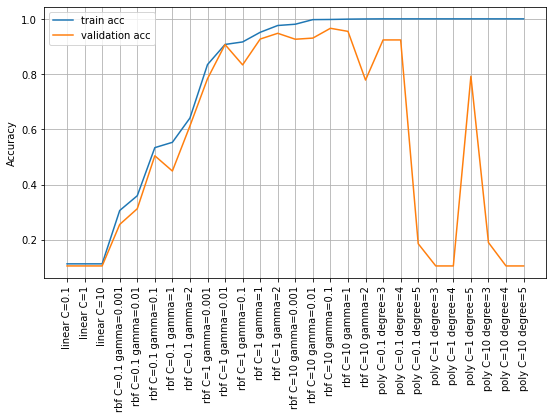

In [36]:
# Plotting the scores for the models on the training and the validation set.
params = []
for item in params_names:
    if item["svc__kernel"] == "linear":
        params.append(item["svc__kernel"] + " C=" + str(item["svc__C"]))
    elif item["svc__kernel"] == "rbf":
        params.append(item["svc__kernel"] + " C=" + str(item["svc__C"]) + " gamma=" + str(item["svc__gamma"]))
    else:
        params.append(item["svc__kernel"] + " C=" + str(item["svc__C"]) + " degree=" + str(item["svc__degree"]))

params, mean_train_scores, mean_val_scores = sort_list(params, mean_train_scores, mean_val_scores)

fig = plt.figure(figsize=(9,5))
plt.plot(mean_train_scores, label="train acc")
plt.plot(mean_val_scores, label="validation acc")
plt.legend()
plt.grid()
plt.ylabel('Accuracy')
_ = plt.xticks(range(len(params)), params, rotation ='90')

In [23]:
# Showing the best score on the validation set as well as the best parameters.
print("Best parameter (CV score=%0.3f):" % grid_search.best_score_)
print(grid_search.best_params_)

Best parameter (CV score=0.966):
{'svc__C': 10, 'svc__degree': 3, 'svc__kernel': 'poly'}


In [24]:
# Training the model using the best hyperparameters found and then using it to calculate the test accuracy.
best_model = Pipeline(steps=[('scale', StandardScaler()), ("svc", SVC(kernel='poly', degree=3, C=10))])

start_time = time.time()
best_model.fit(x_train_np, y_train_np)
end_time = time.time()
print(f"Training runtime: {end_time - start_time:.3f} s")

# Saving the trained best model
dump(best_model, 'svm.joblib') 

Training runtime: 320.418 s


['svm.joblib']

In [25]:
# Evaluating the model on the test data
print("Evaluating on test data")
start_time_test = time.time()
y_pred = best_model.predict(x_test_np)
end_time_test = time.time()
print(f"Test runtime: {end_time_test - start_time_test:.3f} s")
print(f"Test acc: {accuracy_score(y_test_np, y_pred)*100:.3f}%")
print(classification_report(y_test_np, y_pred))

Evaluating on test data
Test runtime: 49.578 s
Test acc: 97.500%
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.98      0.97      0.97      1032
           3       0.98      0.98      0.98      1010
           4       0.97      0.98      0.97       982
           5       0.97      0.97      0.97       892
           6       0.98      0.97      0.98       958
           7       0.98      0.96      0.97      1028
           8       0.95      0.97      0.96       974
           9       0.97      0.96      0.96      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.98      0.97      0.98     10000



### 2.2.6: Summary

We achieved an overall test accuracy of 97.5% by using SVM. The most influential parameters which we observed were gamma in the case of `rbf` kernel and regularisation parameter `C` in the case of the polynomial kernel. We observed that the linear kernel did not show any significant variations in results when we changed `C`. However, the linear kernel achieved almost perfect train accuracy in almost all the cases of `C`. This indicates that the model might be overfitting to the data. 

In the case of `rbf` kernel, we observed that using values of gamma which were greater than 0.1, almost always resulted in very bad performance on the test set. We also observed that using high gamma and low `C` results in the model not learning anything. In that case, the model even showed accuracy equivalent to random guessing on both the training and the test set. Using `gamma=0.001` and `C=1` showed the best results for `rbf` kernel. Further increasing `C` with this gamma value lead to overfitting on data. The results showed that gamma is a very important parameter in the case of SVMs, and tuning it properly is very important. In the case of the polynomial kernel, we observed that increasing the degree of the polynomial kernel resulted in a decrease in the performance for all the values of C. As expected, increasing `C` led to an increase in the accuracies in the polynomial kernel. 

Also, looking at the confusion matrices for the test data, we observed that the F1-scores for 8 and 9 are lower than the rest; it might be due to the visual similarity of 8 and 9, and our model did not have enough capacity to distinguish them every time. 

One fascinating insight was the influence of gamma on the results. It was interesting to see that gamma has such a major influence on the results. We used part of the data for hyperparameter tuning due to computational reasons. We believe using more data and using bigger ranges for hyperparameter search would definitely improve the results on the test data.

It should also be noted of the significantly high model optimization runtime for SVM ~30 mins, although we only used 20% of training data and validated on entire validation set.

Total run-time ~ 36 mins
- Model optimization: 30 mins
- Training runtime: 5.3 mins
- Test performance: 1 mins

# 2.3: Model [M3] (Neural Networks): *fill-this-in* (25 points)

We use Convolutional Neural Networks in this case. We use them in this case because CNNs have shown excellent results for computer vision tasks, and they also do parameter sharing in the kernels, which reduces the size (in terms of a number of parameters) of the networks. Convolutional Neural networks contain a number of kernels which are basically the parameters to be learned. Each kernel convolves/does a dot product over the whole depth of the input image, and these kernels are stacked together as the next layer. We can also control the size of the resultant output after convolving with a kernel by changing the stride and padding. This gives control on how deep we want to go in the network and how much finer representation we want. We use Multi-class Cross entropy as the loss function. We do not apply any data augmentation to the images. We used Adam as an optimizer in our experiments.

### 2.3.1: Hyper-parameters

Define hyper-parameters for your method here

In [26]:
#Hyperparameters for the model

batch_size_train = 100 
batch_size_test = 100
n_epochs = 30
learning_rate = 2e-3
input_size=1
hidden_layers=[32,64,128]
drop_prob=0.3
num_classes=10
reg=0.001

#Initialise the weights
def weights_init(m):
    if type(m) == nn.Linear:
        m.weight.data.normal_(0.0, 1e-3)
        m.bias.data.fill_(0.)

# Learning rate update functionality        
def update_lr(optimizer, lr):
    for param_group in optimizer.param_groups:
        param_group['lr'] = lr    

### 2.3.2: Data Preprocessing

In [27]:
# Prepare the data
print("Loading dataset....")
transform = transforms.Compose([
                               torchvision.transforms.ToTensor(),
                               torchvision.transforms.Normalize(
                                 (0.1307,), (0.3081,))
                             ])

# Loading the datasets
train_set = torchvision.datasets.MNIST(root='.', train=True, transform=transform, download=True)
train_set, valid_set = torch.utils.data.random_split(train_set, [50000, 10000])
test_set = torchvision.datasets.MNIST(root='.', train=False, transform=transform, download=True)

# Creating the train loader.
train_loader = torch.utils.data.DataLoader(dataset=train_set,
                                           batch_size=batch_size_train,
                                           shuffle=True)
# Creating the val loader.
val_loader = torch.utils.data.DataLoader(dataset=valid_set,
                                           batch_size=batch_size_train,
                                           shuffle=False)
# Creating the test loader.
test_loader = torch.utils.data.DataLoader(dataset=test_set,
                                          batch_size=batch_size_test,
                                          shuffle=False)

Loading dataset....


### 2.3.3: Model

In [28]:
# Defining the model
class Net(nn.Module):
    def __init__(self, input_size, hidden_layers, num_classes):
        super(Net, self).__init__()
        # First convolutional layer
        self.conv1 = nn.Sequential(
            nn.Conv2d(
                in_channels=1,
                out_channels=32,
                kernel_size=3,
                stride=1,
                padding=1,
            ),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2),
            nn.Dropout(drop_prob)
        )
        # Second convolutional layer
        self.conv2 = nn.Sequential(
            nn.Conv2d(32, 64, 3, 1, 1),
            nn.ReLU(),
            nn.MaxPool2d(2),
        )
        # fully connected layer, output 10 classes
        self.out = nn.Linear(64 * 7 * 7, 10)

    def forward(self, x):
        x = self.conv1(x)
        x = self.conv2(x)
        # flatten the output of second conv layer.
        x = x.view(x.size(0), -1)
        output = self.out(x)
        return output  # return x for visualization

### 2.3.4: Fit Model 

In [29]:
# Code for training the model, and evaluating the model

start_cnn = time.time()
device = torch.device("cuda:0") if torch.cuda.is_available() else torch.device("cpu")

# Initialise the model
model = Net(input_size, hidden_layers, num_classes).to(device)
model.apply(weights_init)
running_loss = 0.0
loss_plot_y = []
loss_plot_x =[]
loss_plot_val_y = []
loss_plot_val_x =[]
lr = learning_rate
learning_rate_decay = 0.95
accuracy_plot = []
total_step = len(train_loader)

# Loss function
criterion = nn.CrossEntropyLoss()

# Optimizer
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate, weight_decay=reg)

# For all the epochs.
for epoch in range(n_epochs):
        model.train()
        for (i, (images, labels)) in enumerate(train_loader):
            
            images = images.to(device)
            labels = labels.to(device)
            
            # Forward pass
            outputs = model(images)
            
            # Loss calculation
            loss = criterion(outputs, labels)

            # zeroing the gradients
            optimizer.zero_grad()
            
            # Backpropagate the loss
            loss.backward()
            
            # Update the weights
            optimizer.step()
            running_loss += loss.item()
            if (i + 1) % 50 == 0:
                print ('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}'.format(epoch
                        + 1, n_epochs, i + 1, total_step, loss.item()))
        loss_plot_y.append(running_loss / len(train_loader))
                #loss_plot_x.append(epoch * total_step + i)
        running_loss = 0.0
        loss_plot_x.append(epoch)
        lr *= learning_rate_decay
        update_lr(optimizer, lr)
        
        # Doing the validation step.
        model.eval()
        with torch.no_grad():
            correct = 0
            total = 0
            for (images, labels) in val_loader:
                images = images.to(device)
                labels = labels.to(device)
                outputs = model(images)
                (_, predicted) = torch.max(outputs.data, 1)
                total += labels.size(0)
                correct += (predicted == labels).sum().item()
                loss = criterion(outputs, labels)
                running_loss += loss.item()
            loss_plot_val_y.append(running_loss / len(val_loader))
            accuracy_plot.append(100 * correct / total)

            print('Validation accuracy is: {} %'.format(100 * correct / total))
            print('-'*20)
        running_loss=0.0
        

# Testing the model, although we only use the validation accuracy for selecting the best hyperparameters
model.eval()
with torch.no_grad():
    correct = 0
    total = 0
    for (images, labels) in test_loader:
        images = images.to(device)
        labels = labels.to(device)
        outputs = model(images)
        (_, predicted) = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()


    print ('Accuracy of the network on the test images: {} %'.format(
            100 * correct / total))
end_time_test = time.time()
print("="*20)
print(f"Training runtime: {end_time_test - start_time_test:.3f} s")

Epoch [1/30], Step [50/500], Loss: 0.2826
Epoch [1/30], Step [100/500], Loss: 0.2845
Epoch [1/30], Step [150/500], Loss: 0.0770
Epoch [1/30], Step [200/500], Loss: 0.0885
Epoch [1/30], Step [250/500], Loss: 0.0376
Epoch [1/30], Step [300/500], Loss: 0.0823
Epoch [1/30], Step [350/500], Loss: 0.1284
Epoch [1/30], Step [400/500], Loss: 0.0862
Epoch [1/30], Step [450/500], Loss: 0.0438
Epoch [1/30], Step [500/500], Loss: 0.0384
Validation accuracy is: 98.02 %
--------------------
Epoch [2/30], Step [50/500], Loss: 0.0442
Epoch [2/30], Step [100/500], Loss: 0.0802
Epoch [2/30], Step [150/500], Loss: 0.0610
Epoch [2/30], Step [200/500], Loss: 0.0710
Epoch [2/30], Step [250/500], Loss: 0.0213
Epoch [2/30], Step [300/500], Loss: 0.0654
Epoch [2/30], Step [350/500], Loss: 0.1550
Epoch [2/30], Step [400/500], Loss: 0.0692
Epoch [2/30], Step [450/500], Loss: 0.0317
Epoch [2/30], Step [500/500], Loss: 0.0640
Validation accuracy is: 98.39 %
--------------------
Epoch [3/30], Step [50/500], Loss: 0

Validation accuracy is: 98.92 %
--------------------
Epoch [18/30], Step [50/500], Loss: 0.0185
Epoch [18/30], Step [100/500], Loss: 0.0094
Epoch [18/30], Step [150/500], Loss: 0.0126
Epoch [18/30], Step [200/500], Loss: 0.0335
Epoch [18/30], Step [250/500], Loss: 0.0121
Epoch [18/30], Step [300/500], Loss: 0.0888
Epoch [18/30], Step [350/500], Loss: 0.0078
Epoch [18/30], Step [400/500], Loss: 0.0300
Epoch [18/30], Step [450/500], Loss: 0.0069
Epoch [18/30], Step [500/500], Loss: 0.0560
Validation accuracy is: 99.0 %
--------------------
Epoch [19/30], Step [50/500], Loss: 0.0135
Epoch [19/30], Step [100/500], Loss: 0.0432
Epoch [19/30], Step [150/500], Loss: 0.0046
Epoch [19/30], Step [200/500], Loss: 0.0056
Epoch [19/30], Step [250/500], Loss: 0.0200
Epoch [19/30], Step [300/500], Loss: 0.0255
Epoch [19/30], Step [350/500], Loss: 0.0648
Epoch [19/30], Step [400/500], Loss: 0.0186
Epoch [19/30], Step [450/500], Loss: 0.0034
Epoch [19/30], Step [500/500], Loss: 0.0108
Validation accura

In [30]:
# Saving the model
torch.save(model.state_dict(), "cnn_model.pth")

### 2.2.5: Evaluation


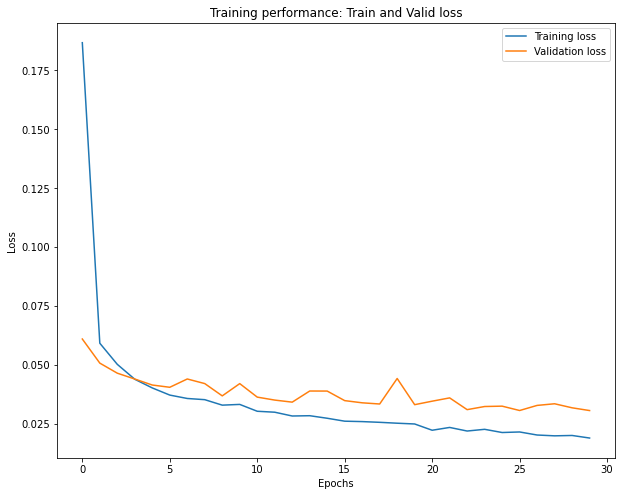

In [31]:
# plotting training and validation loss.
plt.plot(loss_plot_x,loss_plot_y, label="Training loss")
plt.plot(loss_plot_x,loss_plot_val_y, label="Validation loss")
plt.legend()
plt.title('Training performance: Train and Valid loss')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()

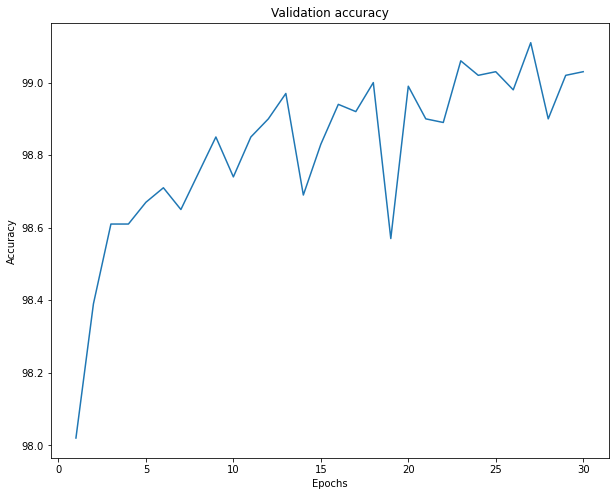

In [32]:
#Plotting validation accuracy and epoch.
plt.plot(np.arange(1,len(accuracy_plot)+1,1),accuracy_plot)
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Validation accuracy")
plt.show()

In [33]:
# Saving the model
model = Net(input_size, hidden_layers, num_classes).to(device)
model.load_state_dict(torch.load("cnn_model.pth", map_location=device))

<All keys matched successfully>

In [34]:
# Running the test loop for the best model and reporting test accuracy.

model.eval()
with torch.no_grad():
    correct = 0
    total = 0
    for (images, labels) in test_loader:
        images = images.to(device)
        labels = labels.to(device)
        outputs = model(images)
        (_, predicted) = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()


print ('Accuracy of the network on the test images: {} %'.format(100 * correct / total))

Accuracy of the network on the test images: 99.17 %


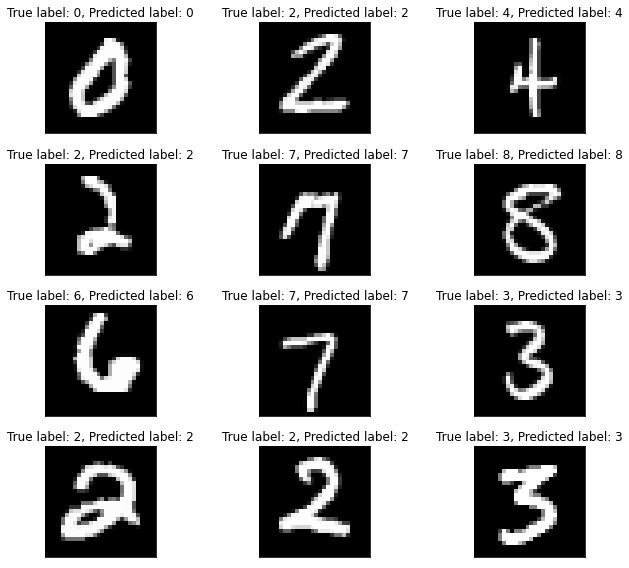

In [35]:
# Visualising some of the predictions on the test set.

predicted_arr = []
labels_arr = []
model.eval()
with torch.no_grad():
    correct = 0
    total = 0
    for (images, labels) in test_loader:
        images = images.to(device)
        labels = labels.to(device)
        outputs = model(images)
        (_, predicted) = torch.max(outputs.data, 1)
        predicted_arr.extend(predicted.cpu().numpy().tolist())
        labels_arr.extend(labels.cpu().numpy().tolist())

x_test_np = torch.flatten(test_loader.dataset.data, start_dim=1, end_dim=2).numpy()
vis_predictions(x_test_np, labels_arr, predicted_arr, len(predicted_arr))

### 2.3.6: Summary

Summarize your findings:

There are a lot of hyperparameters to tune in CNNs so we decided to tune some of the hyperparameters which we thought would influence the results more. The hyperparameters which we experimented with were dropout probability, the learning rate, and the batch size. The below table shows the validation accuracies with the various hyperparameters. p refers to the dropout probability, lr refers to the learning rate of the model and bs refers to the batch size. The first row refers to the default parameters which we then change. The last row also has the number of filters changed to 128 from 64 in the second convolutional layer. Since we did not find to improve our results much, we did not experiment with it further.

| Hyperparameters | Validation Accuracy |
| --- | ----------- |
| p=0.5  lr=2e-3  bs=100 | 99.05% |
| p=0.1  lr=2e-3  bs=100 | 98.98% |
| p=0.7  lr=2e-3  bs=100 | 98.92% |
| p=0.9  lr=2e-3  bs=100 | 95.92% |
| p=0.3  lr=2e-3  bs=100 | 99.07% |
| p=0.3  lr=2e-4  bs=100 | 98.85% |
| p=0.3  lr=2e-1  bs=100 | 84.19% |
| p=0.3  lr=2e-5  bs=100 | 96.81% |
| p=0.3  lr=2e-3  bs=1000 | 98.7% |
| p=0.3  lr=2e-4  bs=50 | 98.97% |
| p=0.3  lr=2e-4  bs=300 | 98.46% |
| p=0.3  lr=2e-3  bs=700 | 98.97% |
| p=0.3  lr=2e-3  bs=5 | 98.43% |
| p=0.3  lr=2e-4  bs=200 | 98.63% |
| p=0.3  lr=2e-4  bs=100 | 98.8% |
| p=0.3  lr=2e-4  bs=150 | 98.87% |
| p=0.3  lr=1  bs=32 | 9.97% |
| p=0.3  lr=2e-4  bs=130 | 98.76% |
| p=0.3  lr=2e-3  bs=100 | 98.81% |

Our experiments show that there was not a very large effect of changing the hyperparameters in this case unless we went to extreme values. For example, if we changed the learning rate to 1, then the model did not learn anything and gave equal to random accuracy. Also, making learning rate very low slowed down the training process. We also observed that using very high dropout probabilities such as 0.9 was not very helpful as the accuracy on our validation set decreased in that case. Changing the batch size did not show very large effects on our validation set accuracy. Since in CNNs there can be a lot of hyperparameters which also include changing and experimenting with the model architecture, we tried increasing the number of filters from 64 to 128 in the second layer. That did not show much effect on the validation accuracy. We believe that this is due to the simplicity of the dataset and more complicated datasets would definitely benefit from bigger CNN architectures. 

Total runtime: 5 mins

# 3. Summary (20 points)

Enter your final summary here.

You should now compare performance  on the three models [M1], [M2] and [M3]. Present this in a tabular format and/or using plots.

Which model do you recommend to perform digit classification and why?

Feel free to discuss other insightful observations.

In our experiments, we tried methods with increasing complexity, starting from the non-parametric method K Nearest Neighbours, then we moved to Linear method Support Vector Machines, and then we tried Convolutional Neural Networks. All the methods showed good results due to the simplicity of the dataset. Although as expected, CNNs performed best followed by SVM and further k-NN. SVMs showed good performance but not as good as CNNs. We also tried various hyperparameters for all these models and got to know about the effect of these hyperparameters on the digit classification task. In our experiments, KNNs and SVMs took more time to train as both of them have high computational complexity. SVMs do not make a good choice in this case and for large datasets due to their computational complexity which increases quadratically in the average case and cubically in the worst case. Similarly, KNN also has a large computational complexity as well it has large storage complexity too. So KNNs are also not very suitable in this case. CNNs also make use of the computational power of the Graphical Processing Units and were thus fast in our experiments. 

In the table below, we report the test accuracy for the best models for each of the three models. 

| Method        | Valid. acc | Test acc | Total runtime | Configs     |
|----------     |----------- |----------| --------------|--------     | 
| $k$-NN (M1)   |    97.00%  | 95.7%    | 15 mins       | 24 configs  |
| SVM (M2)      |    96.60%  | 97.5%    | 35 mins       | 27 configs  |
| CNN (M3)      |    99.03%  | 99.17%   | 5 mins        | 30 epochs   |

Certain insightful observation
1. $k$-NN performed worst but was faster than SVM. Training runtime for SVM is significantly high making it the most time expensive model of all.
2. CNN gave the best performance in terms of time compelxity and accuracy.
3. $k$-NN accuracy can be increased if some pre-processing is done on the input image like removing the blur pixels, perform image scaling and use only black and white pixels to obtain more sharp images. 
4. **Total runtime for SVM is high due the fact that the model optimization or the hyperparameter tuning task is very expensive. With 27 total configuration, it took 30 mins to determine the best configuration. This can reduced by using only a little fraction of train data and validation data.**

We recommend Convolutional Neural Networks to perform digit classification. One reason for this is they have shown good results in our experiments. Another reason is that CNNs make a good choice for image-related tasks as they reduce the parameters in the model due to filter weights sharing, and they also make the model object location invariant due to pooling operations. Also, CNNs have shown state of the art results for many years on image related tasks. CNNs or any neural network methods can also be customized according to the size of the dataset and thus the capacity of the models can be increased as much as required for the task. Convolutional neural networks allow the user to experiment and customize the model architecture. While in the case of KNNs and SVMs, the user can only change some hyperparameters but not change the model architecture. Also enhancements such as residual connections make the convolutional neural networks even more powerful.